In [2]:
import pandas as pd
import numpy as np
from sklearn import ensemble
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.sparse import lil_matrix
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import copy
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error, mean_squared_log_error, roc_auc_score, recall_score

In [3]:
train = pd.read_csv("train.csv")
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
train.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

Text(0.5, 1.0, 'Annual_Premium')

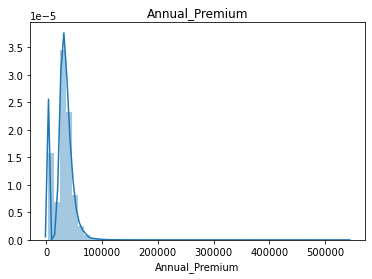

In [5]:
sns.distplot(train['Annual_Premium'])
train['Annual_Premium'].plot
plt.title("Annual_Premium")

Text(0.5, 1.0, 'Policy_Sales_Channel')

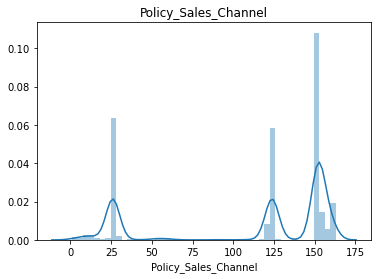

In [6]:
sns.distplot(train['Policy_Sales_Channel'])
train['Policy_Sales_Channel'].plot
plt.title("Policy_Sales_Channel")

Text(0.5, 1.0, 'Vintage')

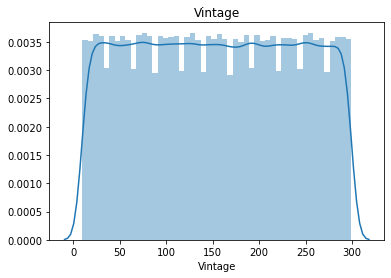

In [7]:
sns.distplot(train['Vintage'])
train['Vintage'].plot
plt.title("Vintage")

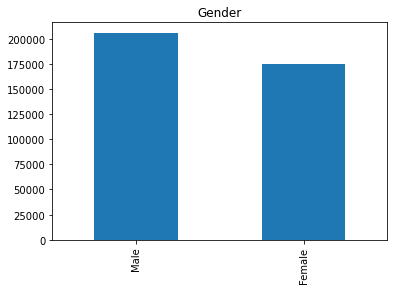

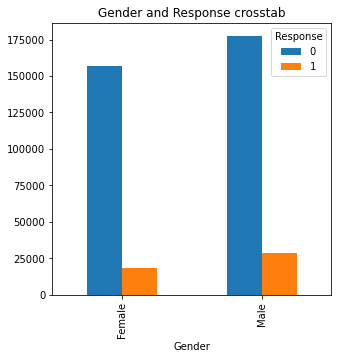

In [8]:
train["Gender"].value_counts().plot.bar()
plt.title("Gender")


DL = pd.crosstab(train['Gender'], train['Response'])
DL.plot(kind="bar", figsize=(5, 5))
plt.title("Gender and Response crosstab")
plt.show()

1    380297
0       812
Name: Driving_License, dtype: int64


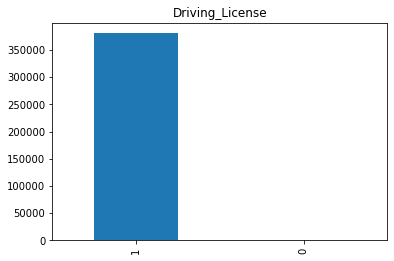

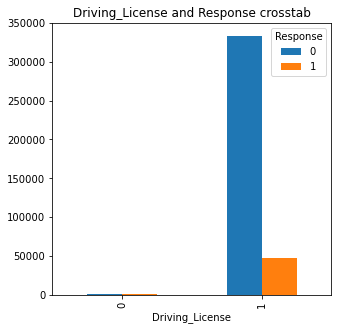

In [9]:
train["Driving_License"].value_counts().plot.bar()
print(train["Driving_License"].value_counts())
plt.title("Driving_License")

DL = pd.crosstab(train['Driving_License'], train['Response'])
DL.plot(kind="bar", figsize=(5, 5))
plt.title("Driving_License and Response crosstab")
plt.show()


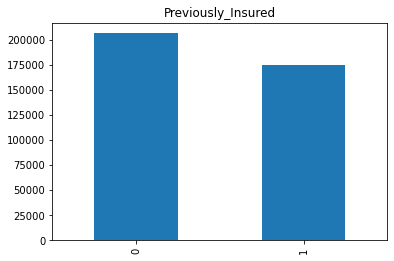

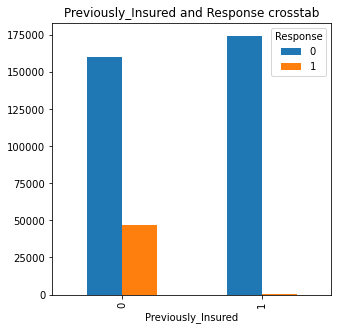

In [10]:
train["Previously_Insured"].value_counts().plot.bar()
plt.title("Previously_Insured")


DL = pd.crosstab(train['Previously_Insured'], train['Response'])
DL.plot(kind="bar", figsize=(5, 5))
plt.title("Previously_Insured and Response crosstab")
plt.show()

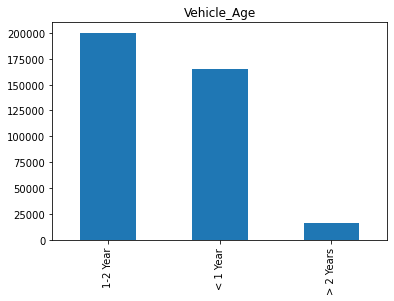

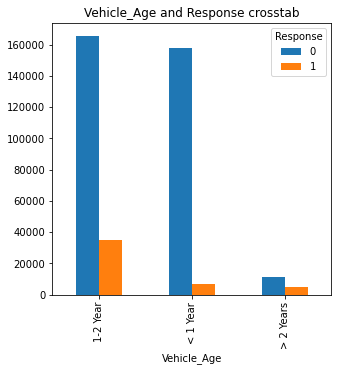

In [11]:


train["Vehicle_Age"].value_counts().plot.bar()
plt.title("Vehicle_Age")


DL = pd.crosstab(train['Vehicle_Age'], train['Response'])
DL.plot(kind="bar", figsize=(5, 5))
plt.title("Vehicle_Age and Response crosstab")
plt.show()



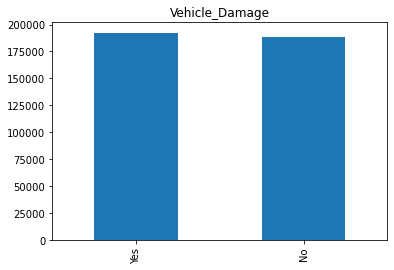

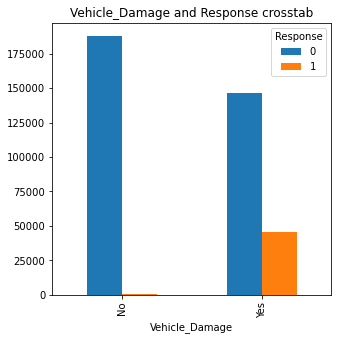

In [12]:
train["Vehicle_Damage"].value_counts().plot.bar()
plt.title("Vehicle_Damage")


DL = pd.crosstab(train['Vehicle_Damage'], train['Response'])
DL.plot(kind="bar", figsize=(5, 5))
plt.title("Vehicle_Damage and Response crosstab")
plt.show()

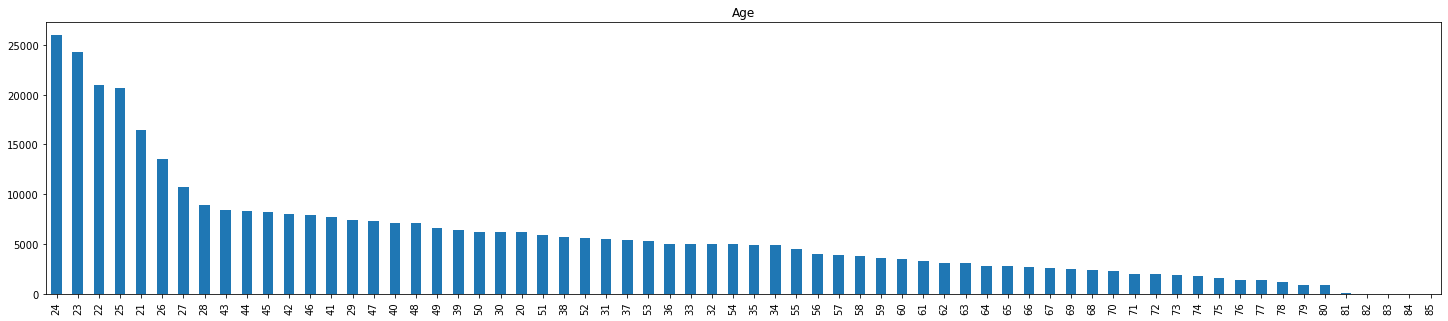

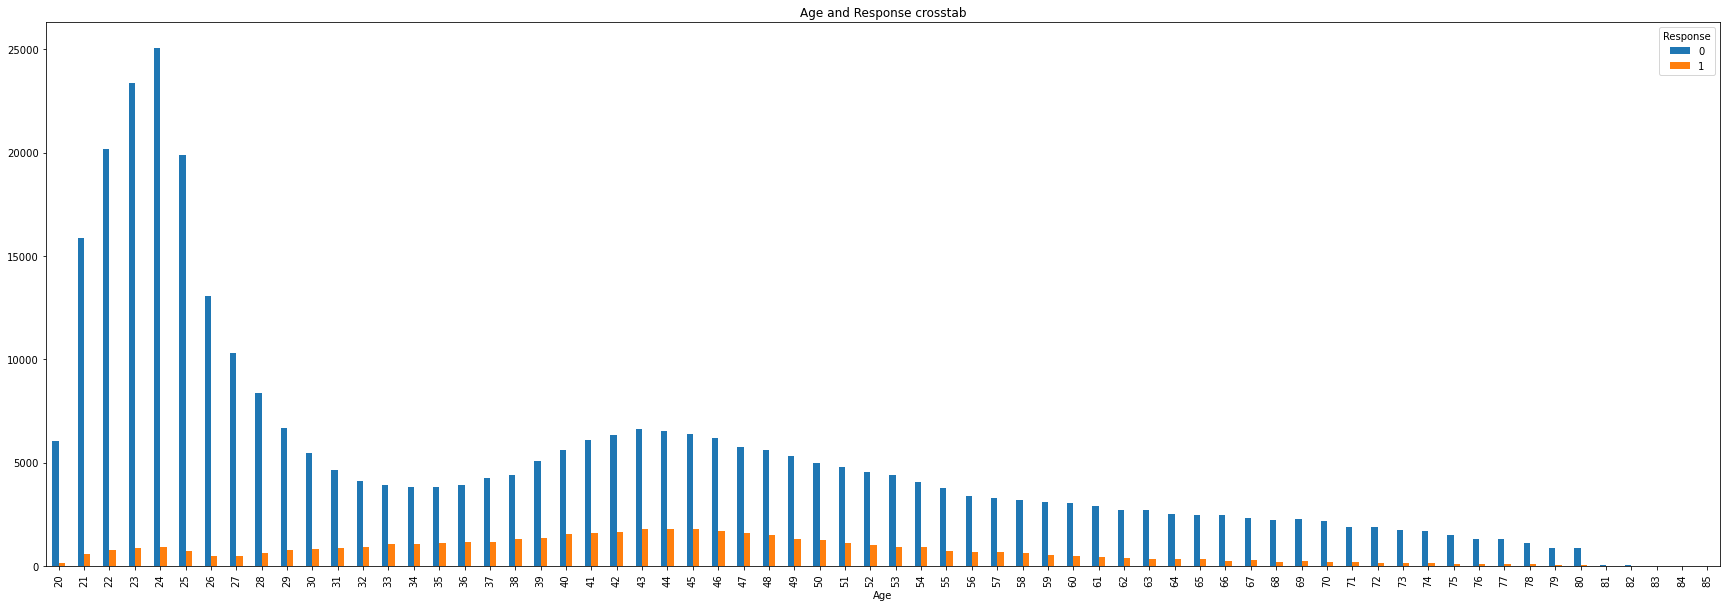

In [13]:
train["Age"].value_counts().plot.bar(figsize=(25,5))
plt.title("Age")


DL = pd.crosstab(train['Age'], train['Response'])
DL.plot(kind="bar", figsize=(30, 10))
plt.title("Age and Response crosstab")
plt.show()

In [14]:
arr = ['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 
          'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']
for i in  arr:
    for j in arr:
        if i!=j:
            df_group = train.groupby([i,j],as_index=False)
            print(len(df_group))
            print(df_group.size())
            print("********************************************")
            print("********************************************")
            print("********************************************")

132
Gender  Age
Female  20      3300
        21      8954
        22     11767
        23     13729
        24     14633
               ...  
Male    81        24
        82        13
        83         7
        84         4
        85         2
Length: 132, dtype: int64
********************************************
********************************************
********************************************
4
Gender  Driving_License
Female  0                     212
        1                  174808
Male    0                     600
        1                  205489
dtype: int64
********************************************
********************************************
********************************************
106
Gender  Region_Code
Female  0.0             752
        1.0             414
        2.0            2055
        3.0            4108
        4.0             729
                       ... 
Male    48.0           2859
        49.0            879
        50.0           5456
      

130
Age  Response
20   0            6061
     1             171
21   0           15883
     1             574
22   0           20201
                 ...  
82   1               1
83   0              21
     1               1
84   0              11
85   0              11
Length: 130, dtype: int64
********************************************
********************************************
********************************************
4
Driving_License  Gender
0                Female       212
                 Male         600
1                Female    174808
                 Male      205489
dtype: int64
********************************************
********************************************
********************************************
119
Driving_License  Age
0                21      1
                 24      1
                 28      1
                 31      1
                 37      1
                        ..
1                81     50
                 82     26
                 

206023
Region_Code  Annual_Premium
0.0          2630.0            2000
             25210.0              1
             27153.0              1
             27211.0              1
             29694.0              1
                               ... 
52.0         60630.0              1
             65784.0              1
             74788.0              2
             142271.0             1
             142313.0             1
Length: 206023, dtype: int64
********************************************
********************************************
********************************************
2236
Region_Code  Policy_Sales_Channel
0.0          3.0                      4
             7.0                     41
             8.0                     12
             9.0                      4
             10.0                     2
                                     ..
52.0         154.0                    4
             156.0                   12
             157.0                    8
      

159
Vehicle_Age  Region_Code
1-2 Year     0.0            1795
             1.0             771
             2.0            1126
             3.0            4615
             4.0            1103
                            ... 
> 2 Years    48.0            336
             49.0             29
             50.0            252
             51.0             12
             52.0             16
Length: 159, dtype: int64
********************************************
********************************************
********************************************
6
Vehicle_Age  Previously_Insured
1-2 Year     0                     134991
             1                      65325
< 1 Year     0                      55529
             1                     109257
> 2 Years    0                      15961
             1                         46
dtype: int64
********************************************
********************************************
********************************************
6
Vehicle_Age

82115
Annual_Premium  Gender
2630.0          Female    27963
                Male      36914
6098.0          Male          1
7670.0          Male          1
8739.0          Female        1
                          ...  
489663.0        Male          1
495106.0        Female        1
508073.0        Female        1
540165.0        Female        1
                Male          3
Length: 82115, dtype: int64
********************************************
********************************************
********************************************
271846
Annual_Premium  Age
2630.0          20     1338
                21     1830
                22     2106
                23     2496
                24     2629
                       ... 
508073.0        50        1
540165.0        26        1
                46        1
                47        1
                53        1
Length: 271846, dtype: int64
********************************************
********************************************
**

292
Policy_Sales_Channel  Previously_Insured
1.0                   0                       896
                      1                       178
2.0                   0                         4
3.0                   0                       472
                      1                        51
                                            ...  
159.0                 1                        31
160.0                 0                     10111
                      1                     11668
163.0                 0                      2526
                      1                       367
Length: 292, dtype: int64
********************************************
********************************************
********************************************
323
Policy_Sales_Channel  Vehicle_Age
1.0                   1-2 Year           8
                      < 1 Year        1066
2.0                   1-2 Year           2
                      > 2 Years          2
3.0                   1-2 Year    

580
Vintage  Response
10       0           1164
         1            147
11       0           1153
         1            191
12       0           1092
                     ... 
297      1            142
298      0           1198
         1            186
299      0           1114
         1            169
Length: 580, dtype: int64
********************************************
********************************************
********************************************
4
Response  Gender
0         Female    156835
          Male      177564
1         Female     18185
          Male       28525
dtype: int64
********************************************
********************************************
********************************************
130
Response  Age
0         20      6061
          21     15883
          22     20201
          23     23364
          24     25047
                 ...  
1         79        60
          80        59
          81         4
          82         1
        

In [15]:


from collections import defaultdict,Counter
aa = defaultdict(int)
for i in train["Annual_Premium"]:
    aa[i] = aa[i]+1
aa = Counter(aa)
print(aa[40454])
aa.most_common(50)



11


[(2630.0, 64877),
 (69856.0, 140),
 (39008.0, 41),
 (45179.0, 38),
 (38287.0, 38),
 (43707.0, 36),
 (30117.0, 36),
 (36086.0, 35),
 (35074.0, 35),
 (38452.0, 34),
 (33877.0, 34),
 (49324.0, 33),
 (29333.0, 33),
 (30105.0, 32),
 (31470.0, 32),
 (70720.0, 32),
 (42118.0, 32),
 (34966.0, 32),
 (37871.0, 31),
 (35149.0, 31),
 (34339.0, 31),
 (32112.0, 31),
 (29675.0, 30),
 (29820.0, 30),
 (28905.0, 30),
 (33436.0, 30),
 (30123.0, 30),
 (29882.0, 30),
 (33002.0, 29),
 (31036.0, 29),
 (42063.0, 29),
 (29057.0, 29),
 (32100.0, 29),
 (30964.0, 29),
 (29639.0, 29),
 (30747.0, 29),
 (37142.0, 28),
 (30996.0, 28),
 (51281.0, 28),
 (30449.0, 28),
 (38911.0, 28),
 (72544.0, 28),
 (30441.0, 28),
 (35382.0, 28),
 (34946.0, 28),
 (32908.0, 28),
 (32876.0, 28),
 (27930.0, 28),
 (32598.0, 28),
 (39443.0, 28)]

(381109, 11)


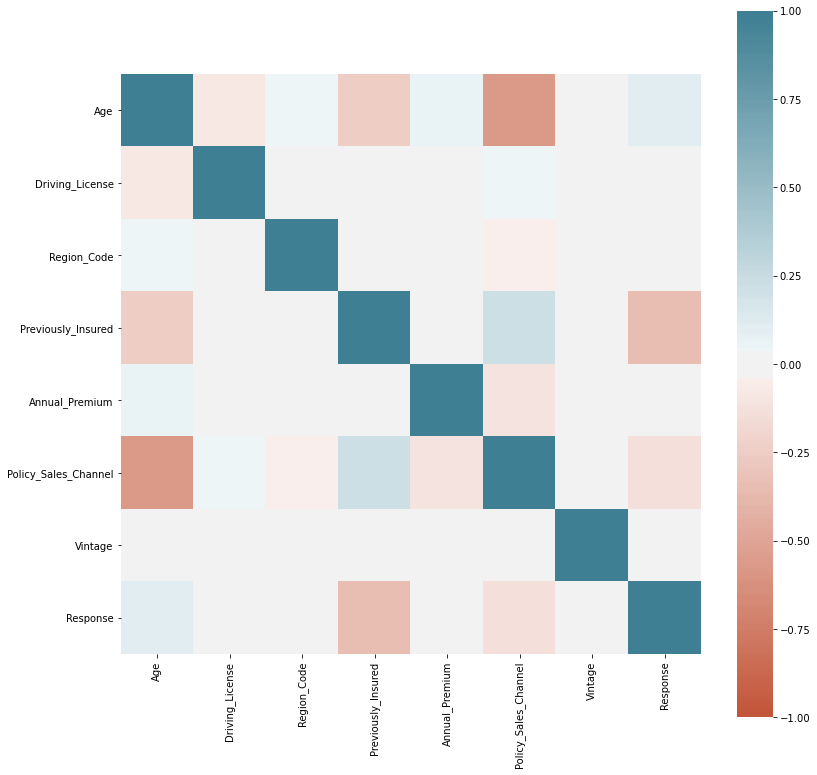

In [17]:
df = train.drop(["id"] , axis=1)
print(df.shape)
corr = df.corr()
fig, ax = plt.subplots(figsize=(13,13))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

In [18]:
df_train = pd.read_csv('train.csv')

df_train['train_flag'] = 1
print(df_train.shape)

df_test = pd.read_csv('test.csv')
df_test['train_flag'] = 0
df_test['Response'] = -1
print(df_test.shape)

df_data = pd.concat([df_train,df_test])
df_data = df_data.reset_index(drop=True)
df_data['Annual_Premium'] = np.log(df_data['Annual_Premium'])
print(df_data.shape)

df_data['Vintage'] = df_data['Vintage']/365


df_data["Region_Code"] = df_data["Region_Code"].astype("int") 
df_data["Annual_Premium"] = df_data["Annual_Premium"].astype("int") 
df_data["Policy_Sales_Channel"] = df_data["Policy_Sales_Channel"].astype("int")



df_data['Gender'] = df_data['Gender'].replace({'Male':1,'Female':0})
df_data['Vehicle_Damage'] = df_data['Vehicle_Damage'].replace({'Yes':1,'No':0})
df_data['Vehicle_Age']=df_data['Vehicle_Age'].replace({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})



# le = LabelEncoder()
# df_data["Gender"] = le.fit_transform(df_data["Gender"])

# le = LabelEncoder()
# df_data["Vehicle_Age"] = le.fit_transform(df_data["Vehicle_Age"])
# mapping_dict = dict(zip(le.transform(le.classes_) , le.classes_))

# le = LabelEncoder()
# df_data["Vehicle_Damage"] = le.fit_transform(df_data["Vehicle_Damage"])



# def agefunc(x):
#     if x <= 27 or x >= 75:
#         return 0
#     elif x <= 32 or x >= 49:
#         return 1
#     else:
#         return 2
# df_data["Age_label"] = df_data["Age"].apply(agefunc) 

df_data["DL_PI"]    = df_data.groupby(["Driving_License", "Previously_Insured"]).ngroup().astype('int')
df_data["DL_VD"]    = df_data.groupby(["Driving_License", "Vehicle_Damage"]).ngroup().astype('int')
df_data["DL_G"]     = df_data.groupby(["Driving_License", "Gender"]).ngroup().astype('int')
df_data["DL_VA"]    = df_data.groupby(["Driving_License", "Vehicle_Age"]).ngroup().astype('int')

# df_data["zz"]    = df_data.groupby(["Vehicle_Age", "Vehicle_Damage"]).ngroup().astype('int')


# df_data["AP_count"]    = df_data.groupby(["Annual_Premium"])["id"].transform('count')

df_data["region_per_premium"] = df_data.groupby(["Region_Code"])["Annual_Premium"].transform('mean')
df_data["region_sum_premium"] = df_data.groupby(["Region_Code"])["Annual_Premium"].transform('sum')
df_data["region_unique_premium"] = df_data.groupby(["Region_Code"])["Annual_Premium"].transform('nunique')

# df_data["vehicle_age_per_premium"] = df_data.groupby(["Vehicle_Age"])["Annual_Premium"].transform('mean')
# df_data["previously_insured_per_premium"] = df_data.groupby(["Previously_Insured"])["Annual_Premium"].transform('mean')
# df_data["age_per_premium"] = df_data.groupby(["Age"])["Annual_Premium"].transform('mean')
# df_data["gender_per_premium"] = df_data.groupby(["Gender"])["Annual_Premium"].transform('mean')
# df_data["vintage_per_premium"] = df_data.groupby(["Vintage"])["Annual_Premium"].transform('mean')
# df_data["Policy_Sales_Channel_per_premium"] = df_data.groupby(["Policy_Sales_Channel"])["Annual_Premium"].transform('mean')


df_data.head()

(381109, 13)
(127037, 13)
(508146, 13)


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,train_flag,DL_PI,DL_VD,DL_G,DL_VA,region_per_premium,region_sum_premium,region_unique_premium
0,1,1,44,1,28,0,2,1,10,26,0.594521,1,1,2,3,3,5,9.794078,1390142,6
1,2,1,76,1,3,0,1,0,10,26,0.501370,0,1,2,2,3,4,9.262693,114385,5
2,3,1,47,1,28,0,2,1,10,26,0.073973,1,1,2,3,3,5,9.794078,1390142,6
3,4,1,21,1,11,1,0,0,10,152,0.556164,0,1,3,2,3,3,9.477774,116842,5
4,5,0,29,1,41,1,0,0,10,152,0.106849,0,1,3,2,2,3,9.611680,234525,5


In [19]:
df_data = df_data.sample(frac=1)
train = df_data[df_data["train_flag"] == 1]
test  = df_data[df_data["train_flag"] == 0]
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)
print(train.shape , test.shape)
train

(381109, 20) (127037, 20)


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,train_flag,DL_PI,DL_VD,DL_G,DL_VA,region_per_premium,region_sum_premium,region_unique_premium
0,254454,1,61,1,28,1,1,0,10,122,0.052055,0,1,3,2,3,4,9.794078,1390142,6
1,10416,0,28,1,28,0,1,1,10,26,0.115068,1,1,2,3,2,4,9.794078,1390142,6
2,32113,1,25,1,36,0,0,1,9,152,0.747945,0,1,2,3,3,3,9.461098,110657,5
3,202477,0,22,1,15,1,0,0,10,152,0.421918,0,1,3,2,2,3,9.498873,168605,4
4,153859,1,33,1,30,1,0,0,10,152,0.739726,0,1,3,2,3,3,9.460986,153987,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,160767,0,40,1,28,0,1,1,10,125,0.380822,0,1,2,3,2,4,9.794078,1390142,6
381105,68478,1,57,1,35,0,1,1,7,154,0.591781,0,1,2,3,3,4,9.365882,87187,5
381106,67878,0,24,1,36,1,0,0,10,152,0.780822,0,1,3,2,2,3,9.461098,110657,5
381107,369069,0,68,1,28,1,1,0,10,23,0.701370,0,1,3,2,2,4,9.794078,1390142,6


In [20]:
def train_model(X , Y):
    # model = CatBoostClassifier( n_estimators=800, depth=4, verbose=0)
    # model = RandomForestClassifier()
    # model = XGBClassifier(n_estimators=800 , max_depth=4, verbose=0)
    # model = XGBClassifier(verbose=0)
    model = LGBMClassifier(max_depth=9 , n_estimators=120 , num_leaves=50, metric='auc')
    model.fit(X,Y)

    # skf = StratifiedKFold(n_splits=10)
    # print(skf)
    # for train_index, test_index in skf.split(X, Y):
    #     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    #     y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    #     model.fit(X_train,y_train)
    #     print(roc_auc_score(y_test,  model.predict_proba(X_test)[:,1]))


    print(X.columns)
    return model







def prediction(model):
    X = test[array1]
    print(X.shape)
    print(X.columns)


    col1 = test["id"].values
    col2 = model.predict_proba(X)
    return col1,col2

In [21]:
array1 = ['id', 'Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 
          'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response', 'train_flag']
print(len(array1))

col_to_drop = ["id", "train_flag", "Response", "Vintage", "Driving_License"]
for i in col_to_drop:
    array1.remove(i)
print(len(array1))

col_to_add = ["DL_PI", "region_per_premium", "region_sum_premium"]
array1.extend(col_to_add)
print(len(array1))





X = train[array1]
Y = train["Response"]
print(X.shape, Y.shape)
m = train_model(X , Y)

13
8
11
(381109, 11) (381109,)
Index(['Gender', 'Age', 'Region_Code', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'DL_PI',
       'region_per_premium', 'region_sum_premium'],
      dtype='object')


In [22]:
print(roc_auc_score( Y,  m.predict_proba(X)[:,1]))
col1,col2 =  prediction(m)
print(col1.shape , col2.shape)



# col3 = []
# if col2.shape == (len(df_test),1):
#     for i in range(len(df_test)):
#         col3.append(col2[i][0])
#     col2 = copy.deepcopy(col3)
# print(np.array(col2).shape)

0.8657065644692044
(127037, 11)
Index(['Gender', 'Age', 'Region_Code', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'DL_PI',
       'region_per_premium', 'region_sum_premium'],
      dtype='object')
(127037,) (127037, 2)


In [23]:
c1 , c2 = [] , []
# c2 = map(lambda x: mapping_dict[x], col2)

diction = {'id': col1, 'Response': col2[:,1] } 
df_fin = pd.DataFrame(diction) 

filename = "ansq.csv"

df_fin.to_csv(filename , index=False)